# Group 4
- Hein Htet Aung
- Moe Khant Zaw
- Win Min Oo

# Dataset

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('/kaggle/input/-spotify-tracks-dataset/dataset.csv')
df.drop(columns=['Unnamed: 0'], inplace = True)
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [2]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,114000.0,33.238535,22.305078,0.000,17.00000,35.000000,50.0000,100.000
duration_ms,114000.0,228029.153114,107297.712645,0.000,174066.00000,212906.000000,261506.0000,5237295.000
danceability,114000.0,0.566800,0.173542,0.000,0.45600,0.580000,0.6950,0.985
energy,114000.0,0.641383,0.251529,0.000,0.47200,0.685000,0.8540,1.000
key,114000.0,5.309140,3.559987,0.000,2.00000,5.000000,8.0000,11.000
loudness,114000.0,-8.258960,5.029337,-49.531,-10.01300,-7.004000,-5.0030,4.532
mode,114000.0,0.637553,0.480709,0.000,0.00000,1.000000,1.0000,1.000
speechiness,114000.0,0.084652,0.105732,0.000,0.03590,0.048900,0.0845,0.965
acousticness,114000.0,0.314910,0.332523,0.000,0.01690,0.169000,0.5980,0.996
instrumentalness,114000.0,0.156050,0.309555,0.000,0.00000,0.000042,0.0490,1.000


----

# Data Preprocessing

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load a sample or chunk to inspect column names first
sample = pd.read_csv("/kaggle/input/-spotify-tracks-dataset/dataset.csv", nrows=1000)
columns = sample.columns

# Step 1: Select relevant columns (excluding IDs, names)
columns_to_drop = ['Unnamed: 0', 'track_id', 'track_name', 'album_name', 'artists']
columns = [col for col in columns if col not in columns_to_drop]

# Reload data with only needed columns
df = pd.read_csv("/kaggle/input/-spotify-tracks-dataset/dataset.csv", usecols=columns)

# Step 2: Handle missing values
df = df.fillna(df.mean(numeric_only=True))

# Step 3: Encode 'explicit' and 'track_genre'
if 'explicit' in df.columns:
    df['explicit'] = df['explicit'].astype(int)

if 'track_genre' in df.columns:
    genre_encoder = LabelEncoder()
    df['track_genre'] = genre_encoder.fit_transform(df['track_genre'])

# Step 4: ARM-prep version (no scaling)
df_arm_ready = df.copy()

# Step 5: Classification/Clustering-prep version (with scaling)
X_ml = df.drop(columns=['track_genre']) if 'track_genre' in df.columns else df.copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_ml)


-------

# ARM

In [4]:
from mlxtend.frequent_patterns import apriori, association_rules

# Bin numeric columns into quartiles
df_arm = df.copy()
df_arm_bin = df_arm.copy()
num_cols = df_arm_bin.select_dtypes(include=['float64', 'int64']).columns.drop('track_genre', errors='ignore')

# Bin into quartiles (converted to string)
df_arm_bin[num_cols] = df_arm_bin[num_cols].apply(lambda x: pd.qcut(x, q=4, duplicates='drop').astype(str))

# One-hot encode all columns
df_arm_bin = pd.get_dummies(df_arm_bin)

# Ensure all columns are boolean (0/1)
df_arm_bin = df_arm_bin.astype(bool)

# Run Apriori
frequent_itemsets = apriori(df_arm_bin, min_support=0.1, use_colnames=True)

# Generate rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display rules
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head()


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: divide by zero encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,support,confidence,lift
0,"(popularity_(-0.001, 17.0])",(track_genre),0.253877,0.998000,1.006832
1,"(popularity_(17.0, 35.0])",(track_genre),0.255789,0.990119,0.998881
2,"(popularity_(35.0, 50.0])",(track_genre),0.241421,0.990748,0.999516
3,"(popularity_(50.0, 100.0])",(track_genre),0.240140,0.985812,0.994536
4,"(duration_ms_(-0.001, 174066.0])",(track_genre),0.248061,0.992106,1.000886


--------

# Classification

/usr/local/lib/python3.11/dist-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/usr/local/lib/python3.11/dist-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/usr/local/lib/python3.11/dist-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/usr/local/lib/python3.11/dist-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


              precision    recall  f1-score   support

           0       0.25      0.25      0.25       300
           1       0.39      0.35      0.37       300
           2       0.07      0.07      0.07       300
           3       0.11      0.10      0.10       300
           4       0.35      0.38      0.36       300
           5       0.22      0.17      0.19       300
           6       0.56      0.62      0.59       300
           7       0.41      0.60      0.49       300
           8       0.17      0.12      0.14       300
           9       0.07      0.07      0.07       300
          10       0.53      0.47      0.50       300
          11       0.15      0.09      0.12       300
          12       0.28      0.29      0.29       300
          13       0.52      0.52      0.52       300
          14       0.50      0.49      0.49       300
          15       0.20      0.23      0.22       300
          16       0.58      0.59      0.59       300
          17       0.43    

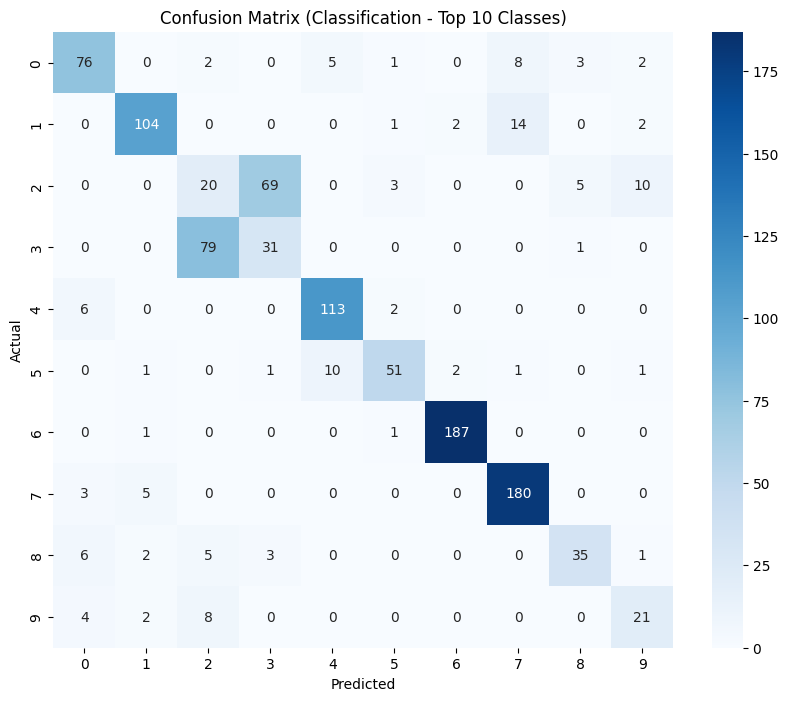

In [5]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X = df.drop(columns=['track_genre'])
y = df['track_genre']
X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Classification report and confusion matrix
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix (first 10 classes for readability)
plt.figure(figsize=(10, 8))
sns.heatmap(cm[:10, :10], annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Classification - Top 10 Classes)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


--------

# CLustering 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.11/dist-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/usr/local/lib/python3.11/dist-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map

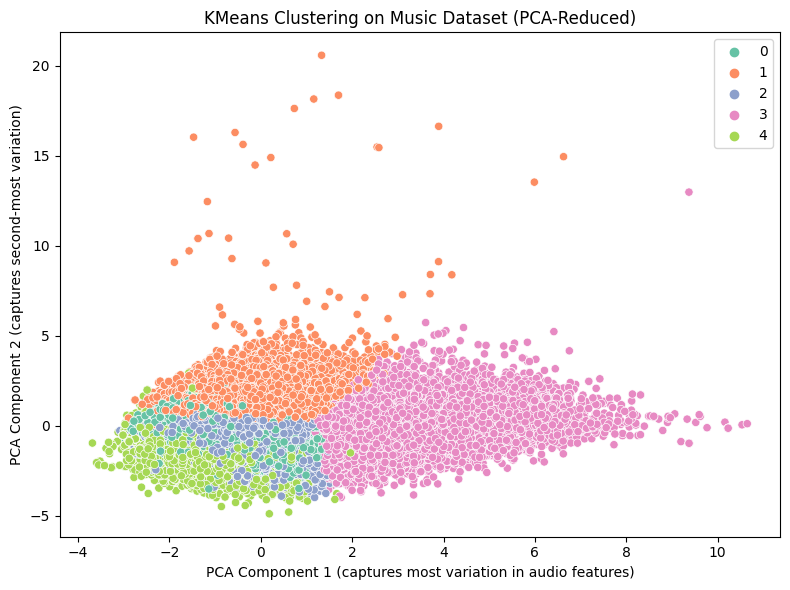

In [6]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/kaggle/input/-spotify-tracks-dataset/dataset.csv")
# Drop high-cardinality or non-useful columns
columns_to_drop = ['Unnamed: 0', 'track_id', 'track_name', 'album_name', 'artists']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Encode categorical columns
le = LabelEncoder()
if 'track_genre' in df.columns:
    df['track_genre'] = le.fit_transform(df['track_genre'])

if 'explicit' in df.columns:
    df['explicit'] = df['explicit'].astype(int)

# Handle missing values
df = df.fillna(df.mean(numeric_only=True))

# Standardize features
X = df.drop(columns=['track_genre']) if 'track_genre' in df.columns else df.copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Plot with clearly labeled components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2', legend='full')
plt.title("KMeans Clustering on Music Dataset (PCA-Reduced)")
plt.xlabel("PCA Component 1 (captures most variation in audio features)")
plt.ylabel("PCA Component 2 (captures second-most variation)")
plt.tight_layout()
plt.show()